In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import math
# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

cwd = os.getcwd()
print(cwd)


import gc

gc.enable()

from bokeh.io import output_notebook, show
from bokeh.models import (
    BasicTicker,
    ColorBar,
    ColumnDataSource,
    LinearColorMapper,
    PrintfTickFormatter,
)
from bokeh.plotting import figure
from bokeh.transform import transform


random_state = 55

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

C:\Users\user\Downloads\BUSA8031


In [2]:
df = pd.read_excel("heart attack.xlsx", sheet_name="heart")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,NaN,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57.0,0.0,0,140,241,0,1,123.0,1,0.2,1,0,3,0
299,45.0,1.0,3,110,264,0,1,132.0,0,1.2,1,0,3,0
300,68.0,1.0,0,144,193,1,1,141.0,0,3.4,1,2,3,0
301,57.0,1.0,0,130,131,0,1,115.0,1,1.2,1,1,3,0
302,57.0,0.0,1,130,236,0,0,174.0,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       291 non-null    float64
 1   sex       298 non-null    float64
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  293 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [6]:
df.describe(include = "all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,291.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,293.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.463918,0.684564,0.966997,131.623762,246.264026,0.148515,0.528053,149.501706,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,8.909966,0.465471,1.032052,17.538143,51.830751,0.356198,0.525860,23.049920,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
categorical_data, numerical_data = [],[]
for a in df.columns:
    b=df.dtypes[a]
    if b == 'object':
        categorical_data.append(a)
    else:
        numerical_data.append(a)

print('Categorical_data:\n {}'.format(categorical_data))
print('Categorical features count: {}'.format(len(categorical_data)))
print('\nNumerical_data:\n {}'.format(numerical_data))
print('Numerical features count: {}'.format(len(numerical_data)))

Categorical_data:
 []
Categorical features count: 0

Numerical_data:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
Numerical features count: 14


In [8]:
nulls = df.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
age,12,0.039604
thalachh,10,0.033003
sex,5,0.016502
output,0,0.000000
thall,0,0.000000
caa,0,0.000000
slp,0,0.000000
oldpeak,0,0.000000
exng,0,0.000000
restecg,0,0.000000


In [9]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38.0,1.0,2,138,175,0,1,173.0,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [12]:
# Checking Unique Values
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


output      1.000000
cp          0.432080
thalachh    0.424578
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.218311
sex        -0.285601
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64


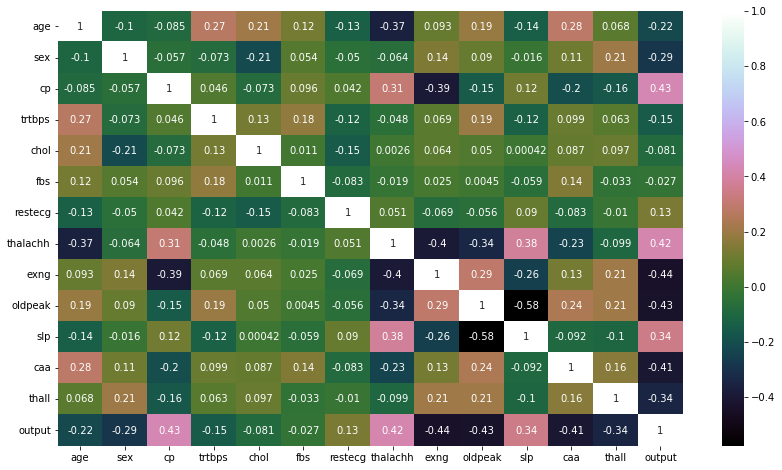

In [13]:
corr =df.corr()
corr.sort_values(['output'], ascending= False, inplace=True)
print(corr.output)
correlationmat = df.corr()
plt.figure(figsize=(14,8))
g=sns.heatmap(df.corr(),annot=True,cmap='cubehelix')

In [14]:
df['age']=df['age'].fillna(df['age'].median()).round()

In [15]:
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,56.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1
5,57.0,1.0,0,140,192,0,1,148.0,0,0.4,1,0,1,1
6,56.0,0.0,1,140,294,0,0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1,120,263,0,1,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2,172,199,1,1,162.0,0,0.5,2,0,3,1
9,57.0,1.0,2,150,168,0,1,174.0,0,1.6,2,0,2,1


In [16]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [17]:
df.head(40)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,56.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1
5,57.0,1.0,0,140,192,0,1,148.0,0,0.4,1,0,1,1
6,56.0,0.0,1,140,294,0,0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1,120,263,0,1,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2,172,199,1,1,162.0,0,0.5,2,0,3,1
9,57.0,1.0,2,150,168,0,1,174.0,0,1.6,2,0,2,1


In [18]:
nulls = df.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
thalachh,10,0.033113
output,0,0.000000
thall,0,0.000000
caa,0,0.000000
slp,0,0.000000
oldpeak,0,0.000000
exng,0,0.000000
restecg,0,0.000000
fbs,0,0.000000
chol,0,0.000000


In [19]:
df1=df.copy()
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,56.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [20]:
test_data = df1[df1["thalachh"].isnull()]

In [21]:
#test_data = test_data.sample(frac=1).reset_index(drop=True)

In [22]:
df1.dropna(inplace=True)

In [23]:
a_train = df1["thalachh"]

In [24]:
#a_train = a_train.sample(frac=1).reset_index(drop=True)

In [25]:
B_train = df1.drop("thalachh",axis=1)

In [26]:
#B_train = B_train.sample(frac=1).reset_index(drop=True)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [28]:
lr.fit(B_train,a_train)

LinearRegression()

In [29]:
lr.score(B_train,a_train)

0.3782630385976018

In [30]:
B_test = test_data.drop("thalachh",axis=1)

In [31]:
B_test

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,output
10,54.0,1.0,0,140,239,0,1,0,1.2,2,0,2,1
13,64.0,1.0,3,110,211,0,0,1,1.8,1,0,2,1
21,56.0,1.0,2,130,233,0,1,1,0.4,2,0,2,1
49,53.0,0.0,0,138,234,0,0,0,0.0,2,0,2,1
71,51.0,1.0,2,94,227,0,1,1,0.0,2,1,3,1
93,54.0,0.0,1,132,288,1,0,1,0.0,2,1,2,1
111,57.0,1.0,2,150,126,1,1,0,0.2,2,1,3,1
112,64.0,0.0,2,140,313,0,1,0,0.2,2,0,3,1
113,43.0,1.0,0,110,211,0,1,0,0.0,2,0,3,1
144,76.0,0.0,2,140,197,0,2,0,1.1,1,0,2,1


In [32]:
from lightgbm import LGBMRegressor
lgbm =  LGBMRegressor()
from sklearn.ensemble import RandomForestRegressor
param_lgb = {
    "boosting_type" :['gbdt','goss','rf'],
    "num_leaves":[12,14,16,18],
    "max_depth": [-1],
    "n_estimators": [100,125,143 , 145, 165], 
    "learning_rate":[0.01,0.1,0.125]}

gsc_lgb = GridSearchCV(
        estimator = RandomForestRegressor,
        param_grid = param_lgb,
        cv=2, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [33]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegressionCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
stack = StackingCVRegressor(
    regressors=[lgbm],
    meta_regressor=Lasso(),
    random_state=random_state,
    cv=5,
    n_jobs=-1,)

In [34]:
cv=5
stack.fit(B_train, a_train)

StackingCVRegressor(meta_regressor=Lasso(), n_jobs=-1, random_state=55,
                    regressors=[LGBMRegressor()])

In [35]:
stack.score(B_train,a_train)

0.7445338575964685

In [36]:
pred = stack.predict(B_test)

In [37]:
pred

array([162.998966  , 140.80229097, 155.95224557, 162.03114202,
       149.47704095, 152.44745422, 151.37092167, 164.28382615,
       161.87106339, 138.27558483])

In [38]:
RANDOM_SEED = 42

In [39]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


ridge = Ridge(random_state=RANDOM_SEED)
lasso = Lasso(random_state=RANDOM_SEED)
rf = RandomForestRegressor(random_state=RANDOM_SEED)

stack = StackingCVRegressor(regressors=(lasso, ridge),
                            meta_regressor=rf, 
                            random_state=RANDOM_SEED,
                            use_features_in_secondary=True)

params = {'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0]}

grid = GridSearchCV(
    estimator=stack, 
    param_grid={
        'lasso__alpha': [x/5.0 for x in range(1, 10)],
        'ridge__alpha': [x/20.0 for x in range(1, 10)],
        'meta_regressor__n_estimators': [10, 100]
    }, 
    cv=5,
    refit=True
)





In [40]:
grid.fit(B_train, a_train)

GridSearchCV(cv=5,
             estimator=StackingCVRegressor(meta_regressor=RandomForestRegressor(random_state=42),
                                           random_state=42,
                                           regressors=(Lasso(random_state=42),
                                                       Ridge(random_state=42)),
                                           use_features_in_secondary=True),
             param_grid={'lasso__alpha': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4,
                                          1.6, 1.8],
                         'meta_regressor__n_estimators': [10, 100],
                         'ridge__alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                          0.4, 0.45]})

In [41]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.141929 using {'lasso__alpha': 1.4, 'meta_regressor__n_estimators': 100, 'ridge__alpha': 0.15}


In [42]:
grid.score(B_train,a_train)

0.7870911938589519

In [43]:
pred_grid = grid.predict(B_test)

In [44]:
pred_grid

array([162.84, 136.24, 153.57, 165.02, 154.99, 156.95, 148.36, 159.01,
       167.02, 129.31])

## This prediction of age will be used further. http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/ (In the link Example 2 is followed)

In [45]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np



svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=5, 
                           random_state=RANDOM_SEED)

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
stack = StackingCVRegressor(regressors=(svr, lasso, rf),
                            meta_regressor=lasso,
                            random_state=RANDOM_SEED)

print('5-fold cross validation scores:\n')

for clf, label in zip([svr, lasso, rf, stack], ['SVM', 'Lasso', 
                                                'Random Forest', 
                                                'StackingCVRegressor']):
    scores = cross_val_score(clf, B_train, a_train, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

R^2 Score: 0.12 (+/- 0.11) [SVM]
R^2 Score: 0.16 (+/- 0.08) [Lasso]
R^2 Score: 0.11 (+/- 0.08) [Random Forest]
R^2 Score: 0.17 (+/- 0.07) [StackingCVRegressor]


In [46]:
rf = RandomForestRegressor(n_estimators=100, 
                           random_state=RANDOM_SEED)

In [47]:
rf.fit(B_train, a_train)

RandomForestRegressor(random_state=42)

In [48]:
rf.score(B_train,a_train)

0.9016209504822617

In [49]:
()

()

In [50]:
pred_rf = rf.predict(B_test).round()

In [51]:
pred_rf

array([162., 138., 154., 166., 155., 153., 151., 156., 163., 131.])

In [52]:
test_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
10,54.0,1.0,0,140,239,0,1,NaN,0,1.2,2,0,2,1
13,64.0,1.0,3,110,211,0,0,NaN,1,1.8,1,0,2,1
21,56.0,1.0,2,130,233,0,1,NaN,1,0.4,2,0,2,1
49,53.0,0.0,0,138,234,0,0,NaN,0,0.0,2,0,2,1
71,51.0,1.0,2,94,227,0,1,NaN,1,0.0,2,1,3,1
93,54.0,0.0,1,132,288,1,0,NaN,1,0.0,2,1,2,1
111,57.0,1.0,2,150,126,1,1,NaN,0,0.2,2,1,3,1
112,64.0,0.0,2,140,313,0,1,NaN,0,0.2,2,0,3,1
113,43.0,1.0,0,110,211,0,1,NaN,0,0.0,2,0,3,1
144,76.0,0.0,2,140,197,0,2,NaN,0,1.1,1,0,2,1


In [53]:
test_data.loc[test_data.thalachh.isnull(),'thalachh']=pred_rf

In [54]:
test_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
10,54.0,1.0,0,140,239,0,1,162.0,0,1.2,2,0,2,1
13,64.0,1.0,3,110,211,0,0,138.0,1,1.8,1,0,2,1
21,56.0,1.0,2,130,233,0,1,154.0,1,0.4,2,0,2,1
49,53.0,0.0,0,138,234,0,0,166.0,0,0.0,2,0,2,1
71,51.0,1.0,2,94,227,0,1,155.0,1,0.0,2,1,3,1
93,54.0,0.0,1,132,288,1,0,153.0,1,0.0,2,1,2,1
111,57.0,1.0,2,150,126,1,1,151.0,0,0.2,2,1,3,1
112,64.0,0.0,2,140,313,0,1,156.0,0,0.2,2,0,3,1
113,43.0,1.0,0,110,211,0,1,163.0,0,0.0,2,0,3,1
144,76.0,0.0,2,140,197,0,2,131.0,0,1.1,1,0,2,1


In [55]:
ha = [df1, test_data]

In [56]:
ha1 = pd.concat(ha)

In [57]:
ha1.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
93,54.0,0.0,1,132,288,1,0,153.0,1,0.0,2,1,2,1
111,57.0,1.0,2,150,126,1,1,151.0,0,0.2,2,1,3,1
112,64.0,0.0,2,140,313,0,1,156.0,0,0.2,2,0,3,1
113,43.0,1.0,0,110,211,0,1,163.0,0,0.0,2,0,3,1
144,76.0,0.0,2,140,197,0,2,131.0,0,1.1,1,0,2,1


In [58]:
ha1 = ha1.sort_index(ascending=True)

In [59]:
ha1.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,56.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1
5,57.0,1.0,0,140,192,0,1,148.0,0,0.4,1,0,1,1
6,56.0,0.0,1,140,294,0,0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1,120,263,0,1,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2,172,199,1,1,162.0,0,0.5,2,0,3,1
9,57.0,1.0,2,150,168,0,1,174.0,0,1.6,2,0,2,1


In [60]:
ha1.tail(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
297,59.0,1.0,0,164,176,1,0,90.0,0,1.0,1,2,1,0
298,57.0,0.0,0,140,241,0,1,123.0,1,0.2,1,0,3,0
299,45.0,1.0,3,110,264,0,1,132.0,0,1.2,1,0,3,0
300,68.0,1.0,0,144,193,1,1,141.0,0,3.4,1,2,3,0
301,57.0,1.0,0,130,131,0,1,115.0,1,1.2,1,1,3,0
302,57.0,0.0,1,130,236,0,0,174.0,0,0.0,1,1,2,0


In [61]:
nulls = ha1.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (ha1.isnull().sum()/ha1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
output,0,0.0
thall,0,0.0
caa,0,0.0
slp,0,0.0
oldpeak,0,0.0
exng,0,0.0
thalachh,0,0.0
restecg,0,0.0
fbs,0,0.0
chol,0,0.0


### Data Visualisation begins from here

output      1.000000
cp          0.432080
thalachh    0.421461
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.211285
sex        -0.272109
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64


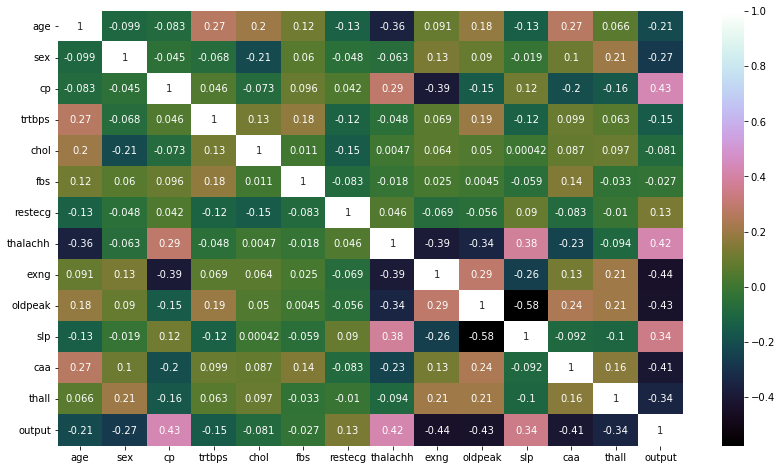

In [62]:
corr =ha1.corr()
corr.sort_values(['output'], ascending= False, inplace=True)
print(corr.output)
correlationmat = ha1.corr()
plt.figure(figsize=(14,8))
g=sns.heatmap(ha1.corr(),annot=True,cmap='cubehelix')

In [63]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial columns are : ", cat_cols)
print("The continuous columns are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial columns are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous columns are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


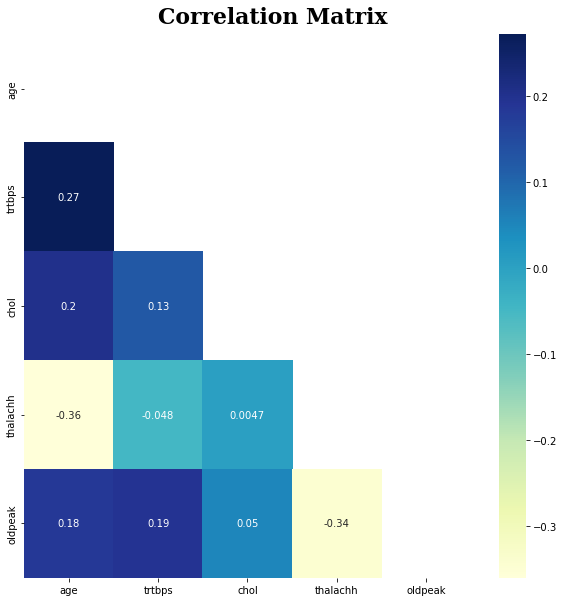

In [64]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
ha1_corr = ha1[con_cols].corr()
sns.heatmap(ha1_corr,mask=np.triu(np.ones_like(ha1_corr)),annot=True,cmap='YlGnBu')
plt.show()

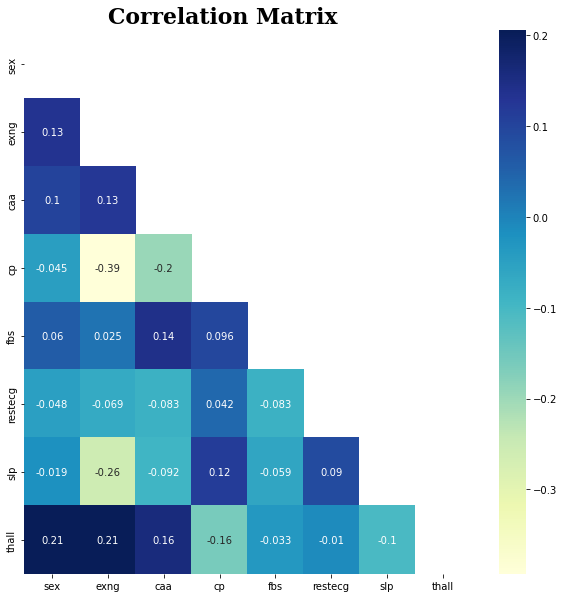

In [65]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
ha1_corr = ha1[cat_cols].corr()
sns.heatmap(ha1_corr,mask=np.triu(np.ones_like(ha1_corr)),annot=True,cmap='YlGnBu')
plt.show()

In [66]:
#!pip install pandas-profiling

In [67]:
#profile.to_file(output_file="ha1.pdf")

In [68]:
#!pip install klib

In [69]:
ha1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,56.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [70]:
import klib

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

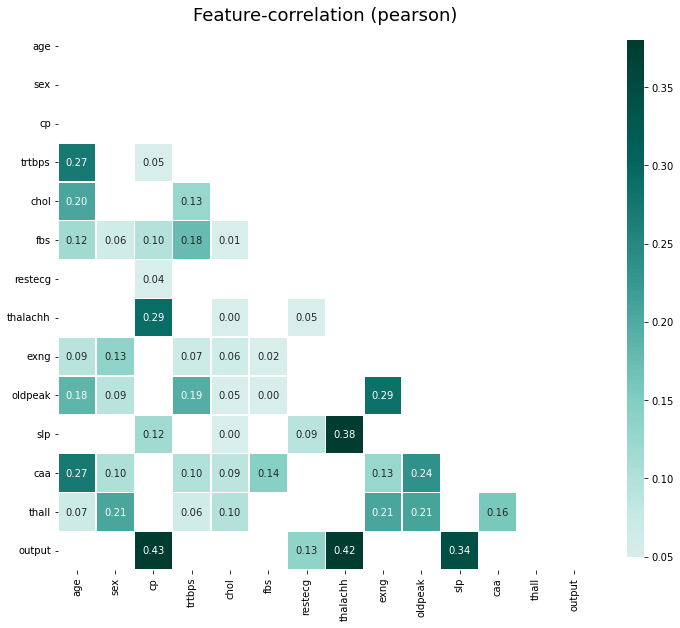

In [71]:
klib.corr_plot(ha1, split='pos') # displaying only positive correlations, other settings include threshold, cmap...

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

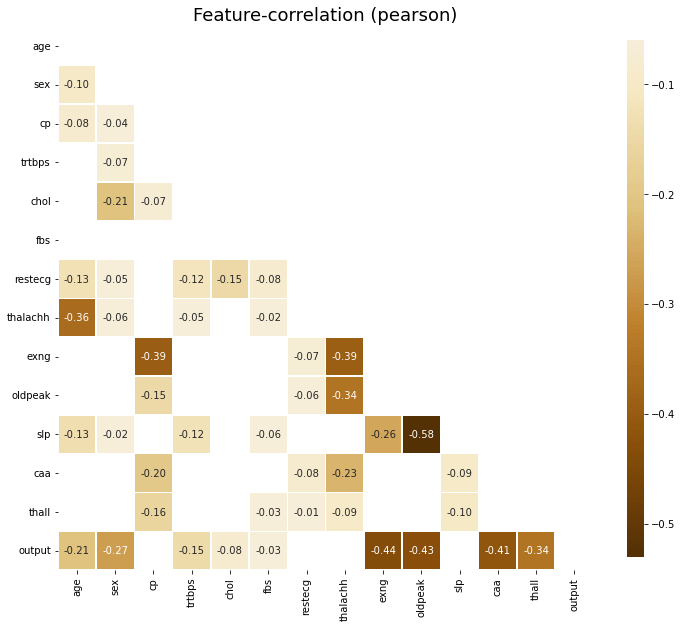

In [72]:
klib.corr_plot(ha1, split='neg') # displaying only negative correlations

### Outlier Check for Continous Variables using Box Plot

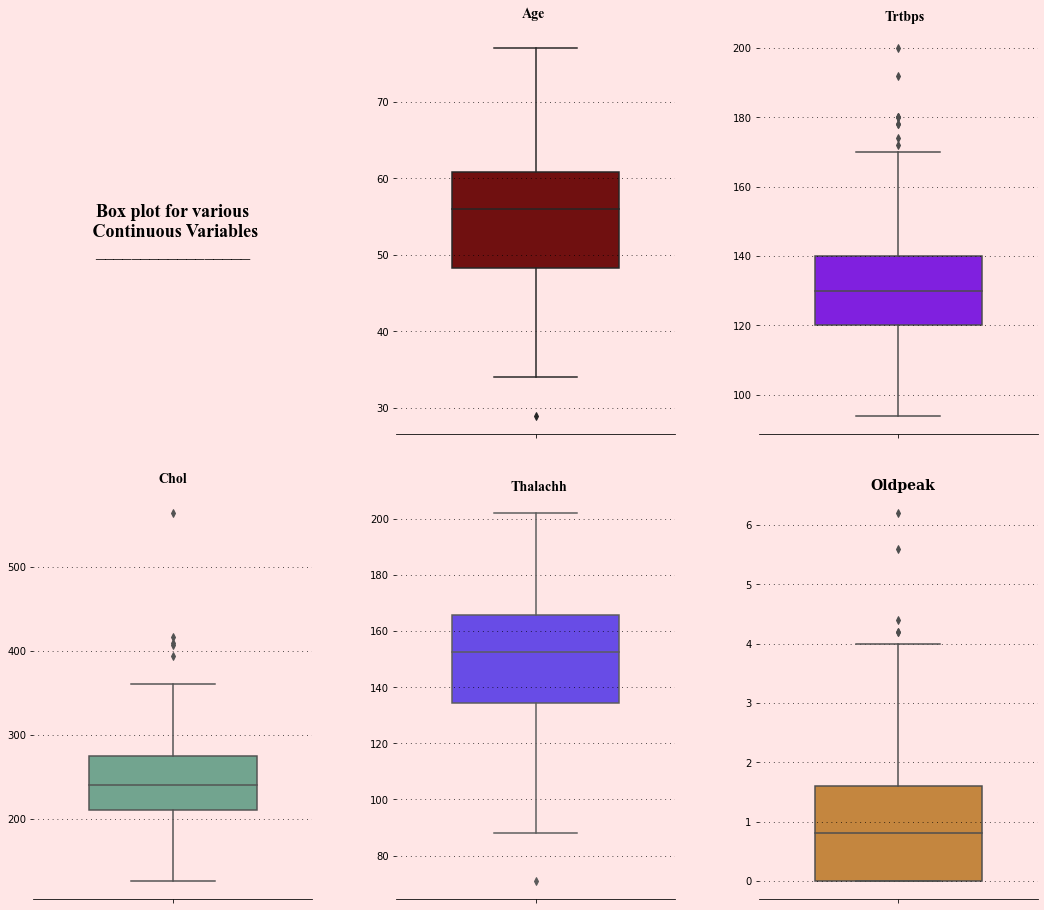

In [73]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n Continuous Variables\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='Times New Roman',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,y=ha1['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,y=ha1['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,y=ha1['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,y=ha1['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

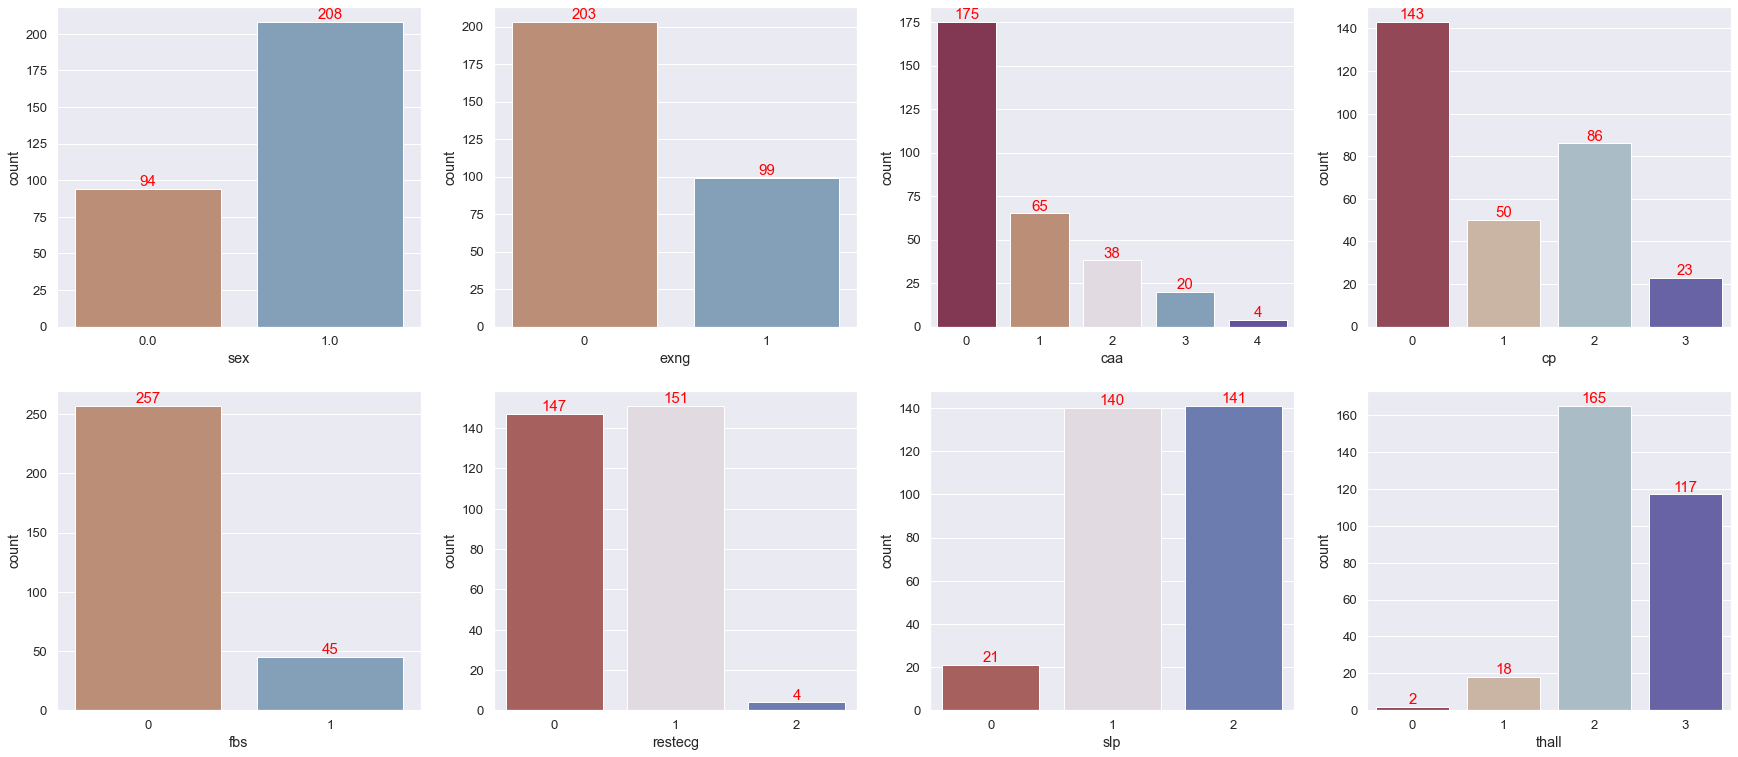

In [74]:
plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for a, feature in enumerate(cat_cols):
    plt.subplot(3, 4, a+1)
    ax=sns.countplot(data=ha1, x=feature, palette="twilight_shifted_r")
    for a in ax.patches:
       
        ax.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

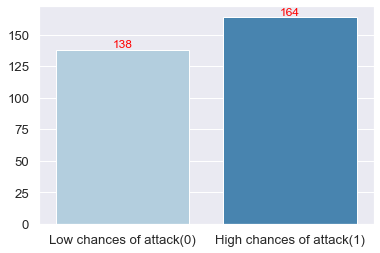

In [75]:
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')
ax1 = sns.countplot(data=ha1, x="output", palette="Blues")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])
for a in ax1.patches:
       
        ax1.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=12, color='red', ha='center', va='bottom') 

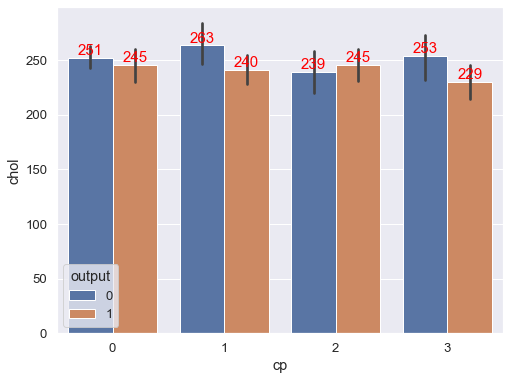

In [77]:
#data = pd.concat([ha1['chol'], ha1['cp']],ha1['output'])
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='cp', y="chol",hue="output", data=ha1)
for a in fig.patches:
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')


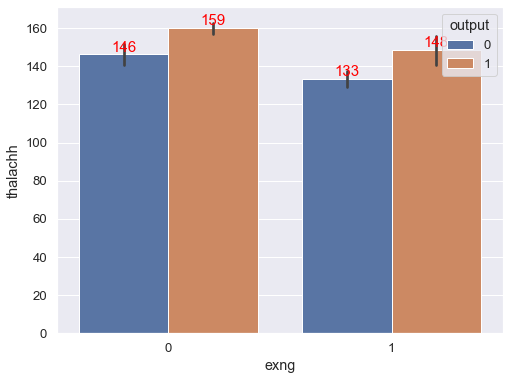

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='exng', y="thalachh",hue="output", data=ha1)

for a in fig.patches:
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

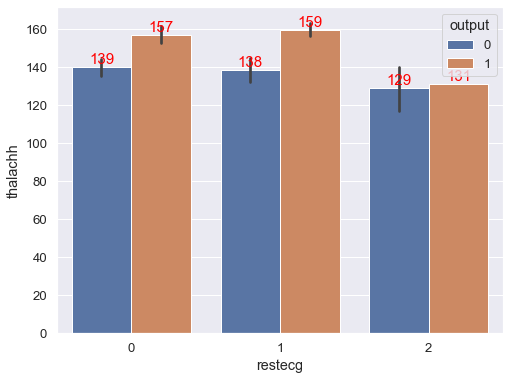

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='restecg', y="thalachh",hue="output", data=ha1)
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

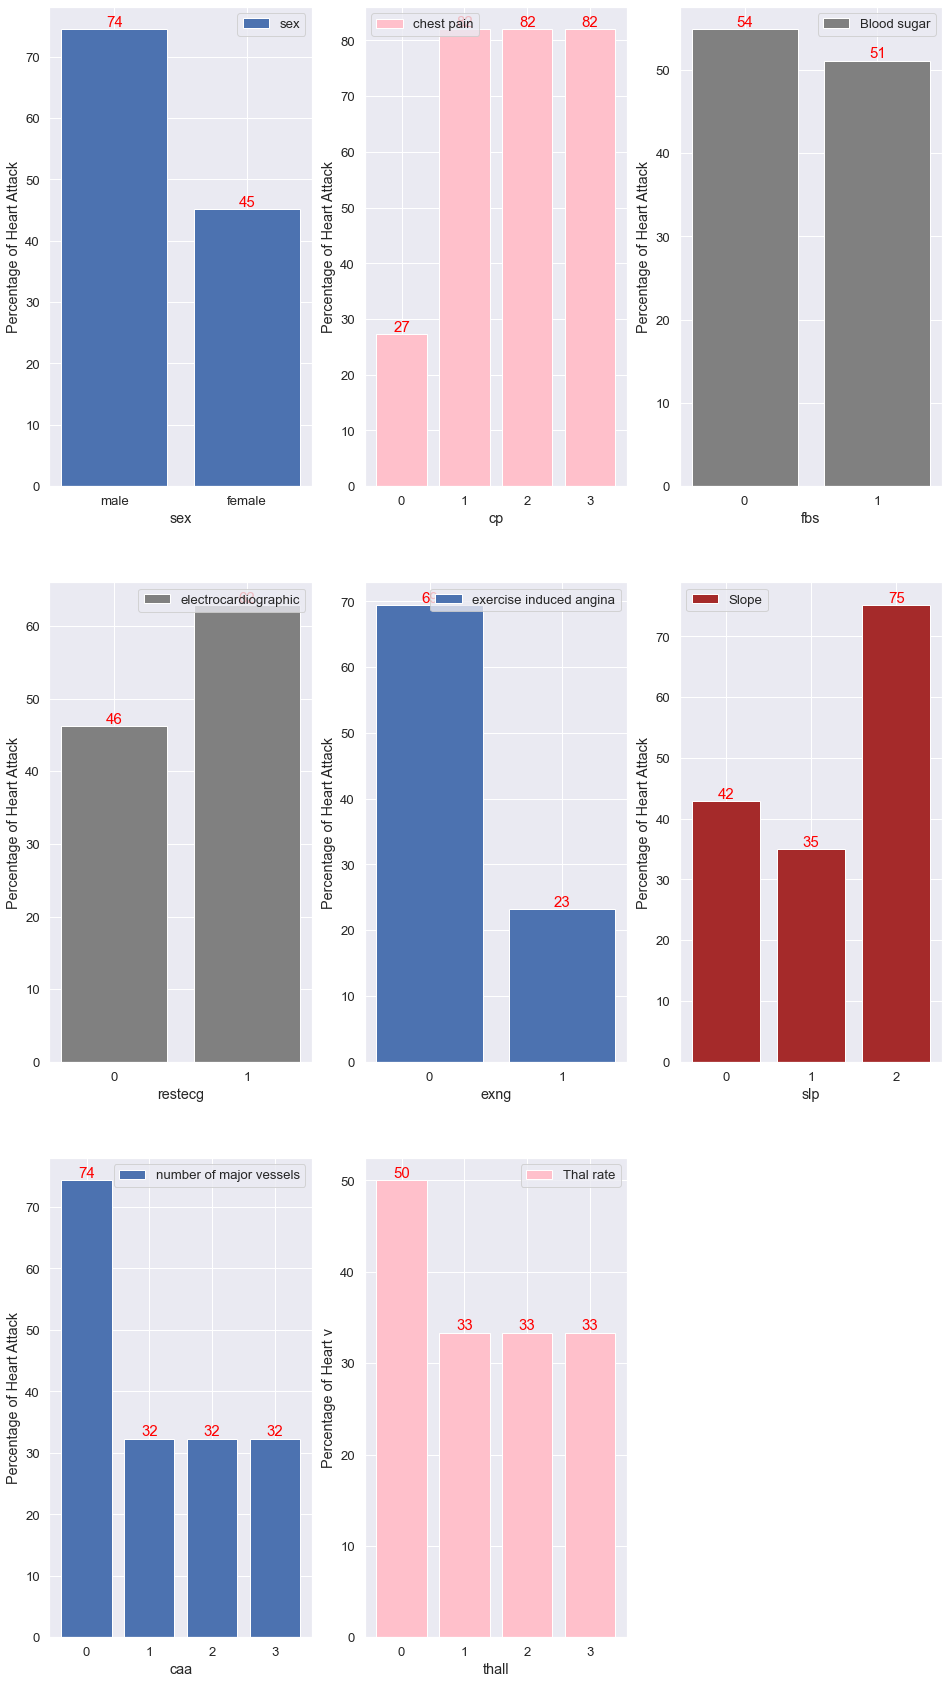

In [82]:
fig=plt.figure(figsize=(16, 30))
fig = plt.subplot(331)
name='sex'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(332)
name='cp'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='chest pain' , color="pink")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(333)
name='fbs'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(334)
name='restecg'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='electrocardiographic' , color="grey")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(335)
name='exng'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')



fig = plt.subplot(336)
name='slp'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
     (100)*ha1[ha1[name]==2]['output'].sum()/len(ha1[ha1[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' , color="brown")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(337)
name='caa'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(338)
name='thall'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Thal rate', color="pink" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart v')
plt.legend()

for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

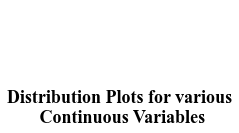

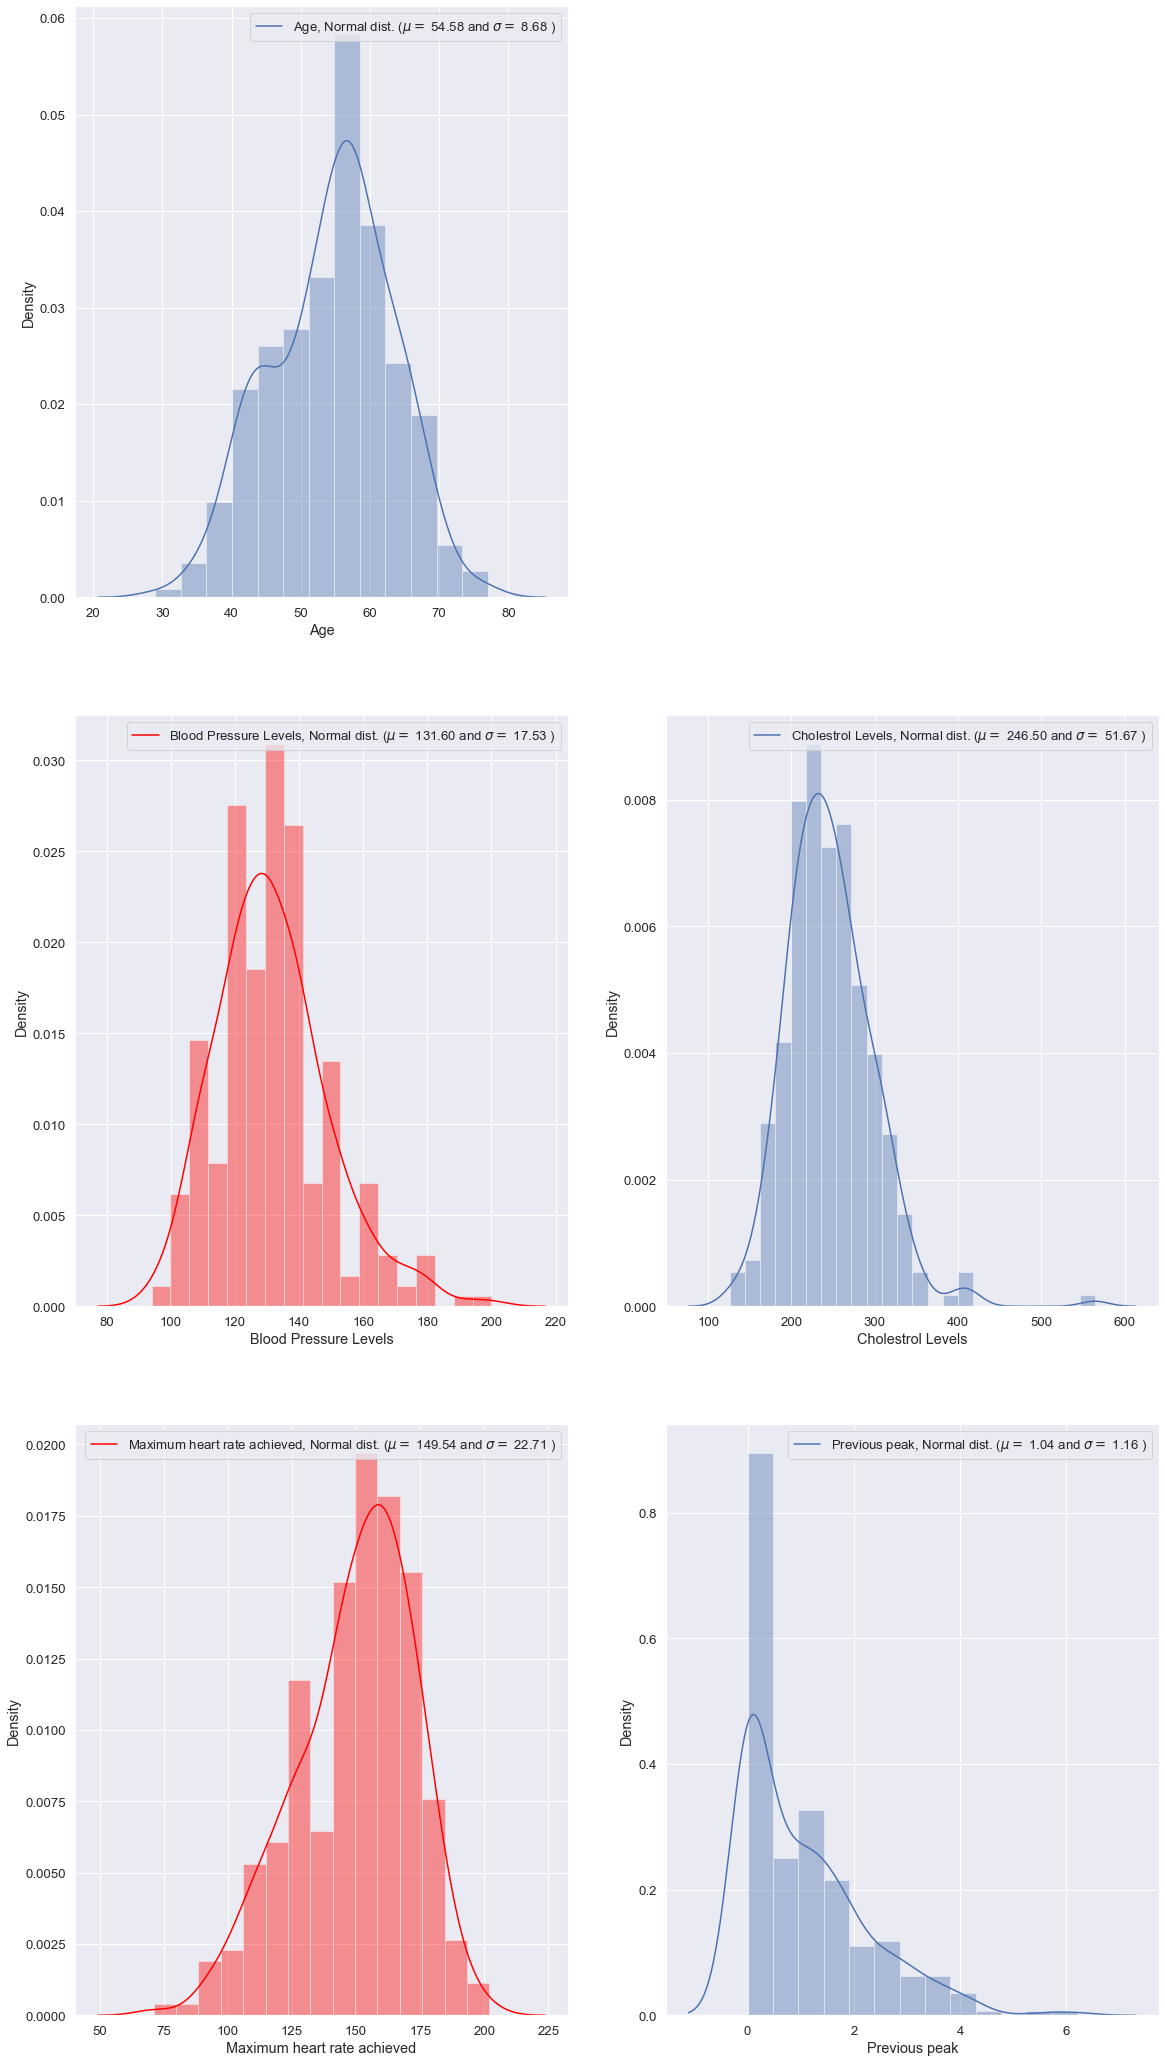

In [83]:
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import norm, skew
# Title of the plot
ax0 = plt.subplot(gs[0,0])
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.set_facecolor("white") 
ax0.text(0,0,
         'Distribution Plots for various\n Continuous Variables',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='Times New Roman',
         color="#000000")

fig=plt.figure(figsize=(30, 50))
fig = plt.subplot(432)
j = sns.distplot(ha1['age'],kde=True,label=' Age');
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['age'])
plt.xlabel('Age')
plt.legend(['Age, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


fig = plt.subplot(435)
i = sns.distplot(ha1['trtbps'], color="red",  kde= True,label='Blood Pressure')
plt.xlabel('Blood Pressure Levels')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['trtbps'])
plt.legend(['Blood Pressure Levels, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.subplot(436)
sns.distplot(ha1['chol'],kde=True,label='cholestrol')
plt.xlabel('Cholestrol Levels')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['chol'])
plt.legend(['Cholestrol Levels, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')



fig = plt.subplot(438)
h = sns.distplot(ha1['thalachh'], color="red",  kde= True,label='Maximum heart rate')
plt.xlabel('Maximum heart rate achieved')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['thalachh'])
plt.legend(['Maximum heart rate achieved, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')



fig = plt.subplot(439)
g = sns.distplot(ha1['oldpeak'],kde=True,label='Old peak')
plt.xlabel('Previous peak')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['oldpeak'])
plt.legend(['Previous peak, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


plt.show()


Most of the people have age between 50-60,less chest pain,blood pressure between 120 to 140, cholestrol between 200-300,blodd sugar less than 120, whereas heart rate between 150-175.



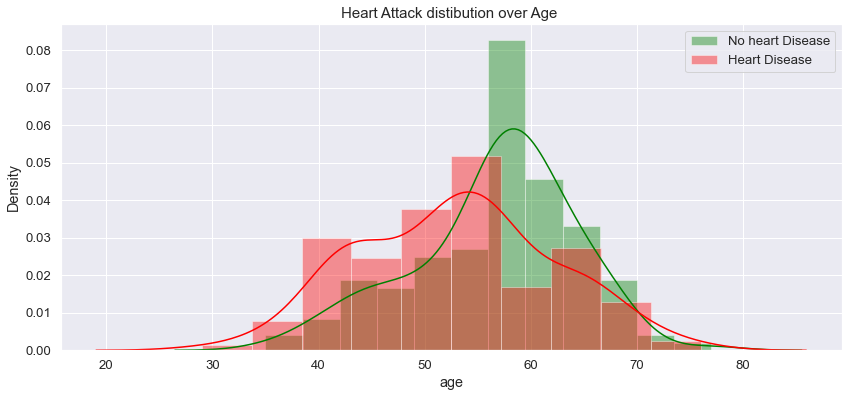

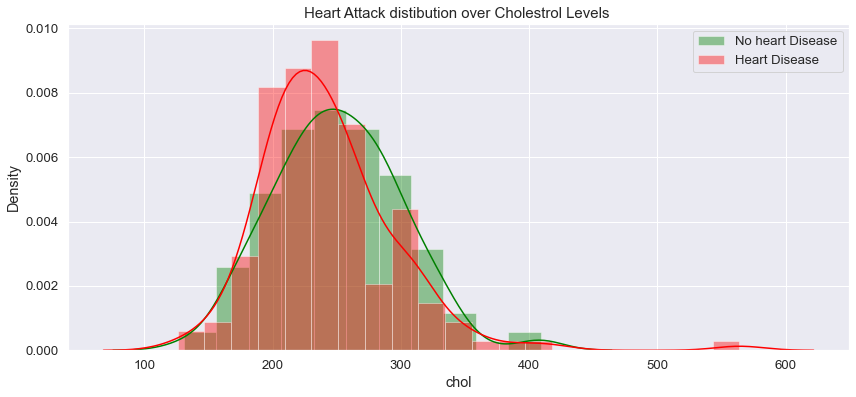

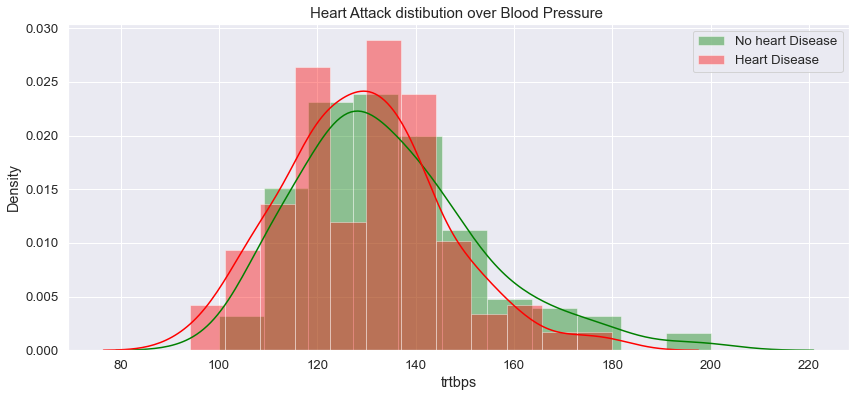

In [84]:
import plotly.figure_factory as ff
fig=plt.figure(figsize=(14, 6))
sns.distplot(ha1[ha1['output'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(ha1[ha1['output'] == 1]["age"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Age ', fontsize=15)
plt.legend()

fig=plt.figure(figsize=(14, 6))
sns.distplot(ha1[ha1['output'] == 0]["chol"], color='green',label='No heart Disease') 
sns.distplot(ha1[ha1['output'] == 1]["chol"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Cholestrol Levels ', fontsize=15)
plt.legend()

fig=plt.figure(figsize=(14, 6))
sns.distplot(ha1[ha1['output'] == 0]["trtbps"], color='green',label='No heart Disease') 
sns.distplot(ha1[ha1['output'] == 1]["trtbps"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Blood Pressure ', fontsize=15)
plt.legend()


In [85]:
skewness = ha1[con_cols].apply(lambda x: skew(x.dropna()))
skewness

age        -0.222647
trtbps      0.712978
chol        1.141626
thalachh   -0.536236
oldpeak     1.259875
dtype: float64

In [86]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous = ["age","trtbps","chol","thalachh","oldpeak"]

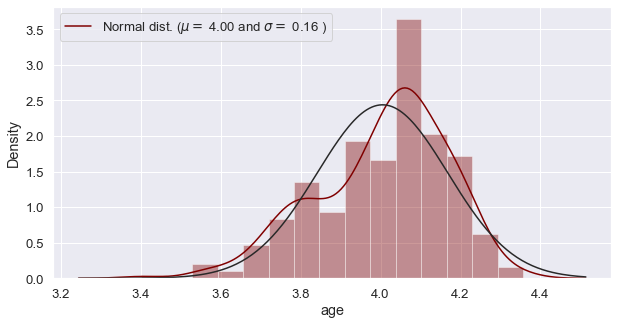

In [87]:
plt.figure(figsize=(10, 5))
ha1['age'] = np.log1p(ha1.iloc[:len(ha1)]['age'])
sns.distplot(ha1.iloc[:len(ha1)]['age'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['age'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

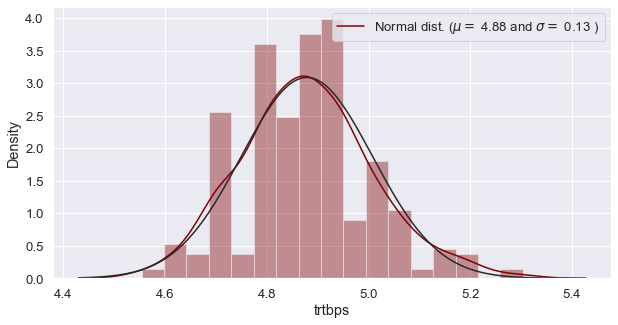

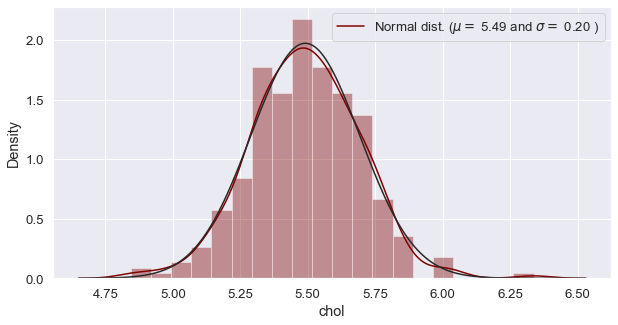

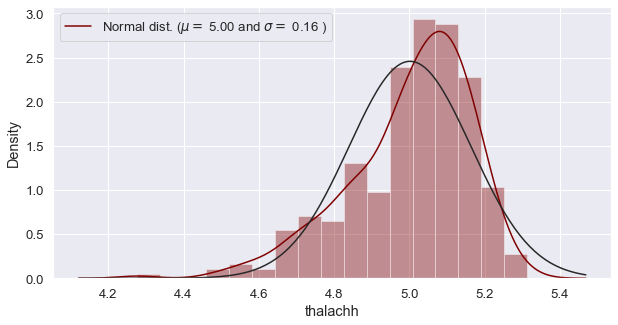

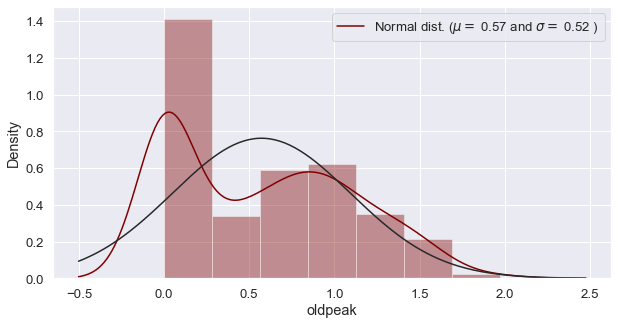

In [88]:
plt.figure(figsize=(10, 5))
ha1['trtbps'] = np.log1p(ha1.iloc[:len(ha1)]['trtbps'])
sns.distplot(ha1.iloc[:len(ha1)]['trtbps'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['trtbps'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.figure(figsize=(10, 5))
ha1['chol'] = np.log1p(ha1.iloc[:len(ha1)]['chol'])
sns.distplot(ha1.iloc[:len(ha1)]['chol'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['chol'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.figure(figsize=(10, 5))
ha1['thalachh'] = np.log1p(ha1.iloc[:len(ha1)]['thalachh'])
sns.distplot(ha1.iloc[:len(ha1)]['thalachh'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['thalachh'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.figure(figsize=(10, 5))
ha1['oldpeak'] = np.log1p(ha1.iloc[:len(ha1)]['oldpeak'])
sns.distplot(ha1.iloc[:len(ha1)]['oldpeak'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['oldpeak'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

In [89]:
ha1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,4.158883,1.0,3,4.983607,5.455321,1,0,5.017280,0,1.193922,0,0,1,1
1,3.637586,1.0,2,4.875197,5.525453,0,1,5.236442,0,1.504077,0,0,2,1
2,4.043051,0.0,1,4.875197,5.323010,0,0,5.153292,0,0.875469,2,0,2,1
3,4.043051,1.0,1,4.795791,5.468060,0,1,5.187386,0,0.587787,2,0,2,1
4,4.060443,0.0,0,4.795791,5.872118,0,1,5.099866,1,0.470004,2,0,2,1


In [90]:
ha2 = ha1

In [91]:
ha2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,4.158883,1.0,3,4.983607,5.455321,1,0,5.017280,0,1.193922,0,0,1,1
1,3.637586,1.0,2,4.875197,5.525453,0,1,5.236442,0,1.504077,0,0,2,1
2,4.043051,0.0,1,4.875197,5.323010,0,0,5.153292,0,0.875469,2,0,2,1
3,4.043051,1.0,1,4.795791,5.468060,0,1,5.187386,0,0.587787,2,0,2,1
4,4.060443,0.0,0,4.795791,5.872118,0,1,5.099866,1,0.470004,2,0,2,1


In [92]:
ha2= pd.get_dummies(ha2, columns = categorical, drop_first = True)

In [93]:
X = ha2.drop(['output'],axis=1)
y = ha2[['output']]

In [99]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1.0,exng_1,caa_1,caa_2,caa_3,caa_4,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,4.158883,4.983607,5.455321,5.017280,1.193922,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,3.637586,4.875197,5.525453,5.236442,1.504077,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,4.043051,4.875197,5.323010,5.153292,0.875469,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,4.043051,4.795791,5.468060,5.187386,0.587787,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,4.060443,4.795791,5.872118,5.099866,0.470004,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)